In [2]:
uri = "https://neutron.ornl.gov/user_data/hb3a/exp16/tools/Crystal%20Plane%20Spacings%20and%20Interplanar%20Angles.htm"
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [4]:
def seleniumDriver():
    """
    Creates Headless selnium Driver
    :return:  selenium driver using chomedriver
    """
    chrome_options = Options()
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome("/usr/bin/chromedriver",
                              options=chrome_options
                             )
    driver.set_page_load_timeout(10)
    return driver

driver = seleniumDriver()
driver.get(uri)

In [64]:
hkl = """0	1	0	1.4908	0.8190
0	-1	0	1.4908	0.8190
				
2	0	0	5.1650	0.4400
-2	0	0	5.1650	0.4400
				
0	2	0	5.9634	0.4095
0	-2	0	5.9634	0.4095
				
1	2	0	7.2546	0.3713
-1	2	0	7.2546	0.3713
1	-2	0	7.2546	0.3713
-1	-2	0	7.2546	0.3713
				
2	2	0	11.1284	0.2998
-2	2	0	11.1284	0.2998
2	-2	0	11.1284	0.2998
-2	-2	0	11.1284	0.2998
				
0	3	0	13.4176	0.2730
0	-3	0	13.4176	0.2730
				
1	3	0	14.7088	0.2607
-1	3	0	14.7088	0.2607
1	-3	0	14.7088	0.2607
-1	-3	0	14.7088	0.2607
				
2	3	0	18.5826	0.2320
-2	3	0	18.5826	0.2320
2	-3	0	18.5826	0.2320
-2	-3	0	18.5826	0.2320
				
4	0	0	20.6600	0.2200
-4	0	0	20.6600	0.2200
				
0	4	0	23.8535	0.2048
0	-4	0	23.8535	0.2048"""
from io import StringIO

name=["h", "k", "l", "1/d2", "d"]
df = pd.read_csv(StringIO(hkl), sep="\t", names = name)
a = .971
b = .819
c = 1.74
beta = 115 
l = .1542

In [65]:
unit = driver.find_element_by_xpath("//select[@name='XtlSystem']")
for opt in unit.find_elements_by_tag_name("option"): 
    if opt.text == "monoclinic": 
        opt.click()
        
planes = driver.find_element_by_xpath("//select[@name='PlaneB']")
for opt in unit.find_elements_by_tag_name("option"): 
    if opt.text == "Plane 2": 
        opt.click()
    
inputangle = driver.find_element_by_xpath("//input[@name='gamma']")
inputangle.clear()
inputangle.send_keys(str(beta))

buff = driver.find_element_by_xpath("//input[@name='Aaxis']")
buff.clear()
buff.send_keys(str(a))
buff = driver.find_element_by_xpath("//input[@name='Baxis']")
buff.clear()
buff.send_keys(str(b))
buff = driver.find_element_by_xpath("//input[@name='Caxis']")
buff.clear()
buff.send_keys(str(c))

In [66]:
buff = driver.find_element_by_xpath("//input[@name='H1']")
buff.clear()
buff.send_keys(str(0))
buff = driver.find_element_by_xpath("//input[@name='K1']")
buff.clear()
buff.send_keys(str(4))
buff = driver.find_element_by_xpath("//input[@name='L1']")
buff.clear()
buff.send_keys(str(0))

In [67]:
for i in df.index: 
    hkl = df.loc[i, :][["h", "k", "l"]].values
    buff = driver.find_element_by_xpath("//input[@name='H2']")
    buff.clear()
    buff.send_keys(str(hkl[0]))
    buff = driver.find_element_by_xpath("//input[@name='K2']")
    buff.clear()
    buff.send_keys(str(hkl[1]))
    buff = driver.find_element_by_xpath("//input[@name='L2']")
    buff.clear()
    buff.send_keys(str(hkl[2]))
    
    sendbtn = driver.find_element_by_xpath("//input[@value='calculate angle']")
    sendbtn.click()
    
    res = driver.find_element_by_xpath("//input[@name='degrees']").get_attribute('value')
    try: 
        df.loc[i, "angle"] = float(res)
    except: 
        pass
    

In [81]:
import matplotlib.pyplot as plt
df['x'] = df.d * np.cos(df.angle * 2 * np.pi / 360)
df["y"] = df.d * np.sin(df.angle * 2 * np.pi / 360)

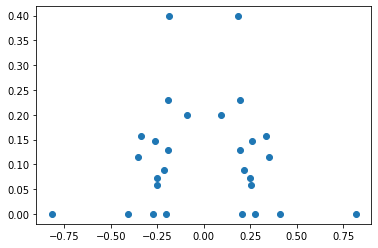

In [82]:
plt.scatter(df.x, df.y)

In [114]:
def func(x): 
    h, k, l = x
    a = .971
    b = .819
    c = 1.74
    beta = 115 * np.pi * 2 / 360
    l = .1542
    numer = (k * 4 / b ** 2)
    denom1 = h ** 2 / a ** 2 + k ** 2 *np.sin(beta) ** 2/ b ** 2 + l ** 2 /  c**2 - 2 * h * l * np.cos(beta)/ (a * c) 
    denom2 = 4 ** 2 * np.cos(beta)*np.sin(beta)**2 / b ** 2
    return numer / (np.sqrt(denom1 * denom2))
    

In [115]:
df["try"] = df[["h", "k", "l"]].apply(lambda x: func(x), axis=1)

/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


In [113]:
print(np.sin(3.14))
df

0.0015926529164868282


,h,k,l,1/d2,d,angle,x,y,try
0,0.0,1.0,0.0,1.4908,0.8190,0.000,0.819000,0.000000e+00,2.902825
1,0.0,-1.0,0.0,1.4908,0.8190,180.000,-0.819000,1.002986e-16,-2.902825
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,0.0,0.0,5.1650,0.4400,65.000,0.185952,3.987754e-01,NaN
4,-2.0,0.0,0.0,5.1650,0.4400,115.000,-0.185952,3.987754e-01,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,2.0,0.0,5.9634,0.4095,0.000,0.409500,0.000000e+00,2.886195
7,0.0,-2.0,0.0,5.9634,0.4095,180.000,-0.409500,5.014929e-17,-2.886195
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,2.0,0.0,7.2546,0.3713,17.973,0.353181,1.145716e-01,4.310692
